In [148]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
import pickle

clf = pickle.load(open('../BoostedTreeclassifier_small.p','rb'))

In [150]:
def plot_ft_weights(clf, file_name):

    # Get corresponding template information for each feature
    feature_info = pickle.load(open('feature_info.p','r'))
    w_viz = np.zeros((11,20,10))
    w_viz_total = np.zeros((20,10))
    
    f = plt.gcf()
    f.set_figheight(15)
    f.set_figwidth(15)
        

    # Sum weights from each feature corresponding to cells in our templates
    for idx, weight in enumerate(clf.feature_importances_):
        x, y, size, k = feature_info[idx]
        w,h = size
        w_viz[k, y:y+h, x:x+w] += weight
        w_viz_total[y:y+h, x:x+w] += weight

#     # Normalize weight visualization matrix and display
    for k in range(11):
        
        W = w_viz[k,:,:]/np.max(w_viz[k,:,:])
        plt.subplot(4,3,k+1)
        nr, nc = W.shape 
        extent = [-0.5, nc-0.5, nr-0.5, -0.5] 
        plt.imshow(W, extent=extent, origin='upper') 

    return w_viz_total/np.max(w_viz_total)
#         plt.title('Feature Importances')

#         ax = plt.gca() 

#         # create an axes on the right side of ax. The width of cax will be 5%
#         # of ax and the padding between cax and ax will be fixed at 0.05 inch.
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes("right", size="5%", pad=0.05)

#         plt.colorbar(im, cax=cax)
#         plt.savefig(file_name)

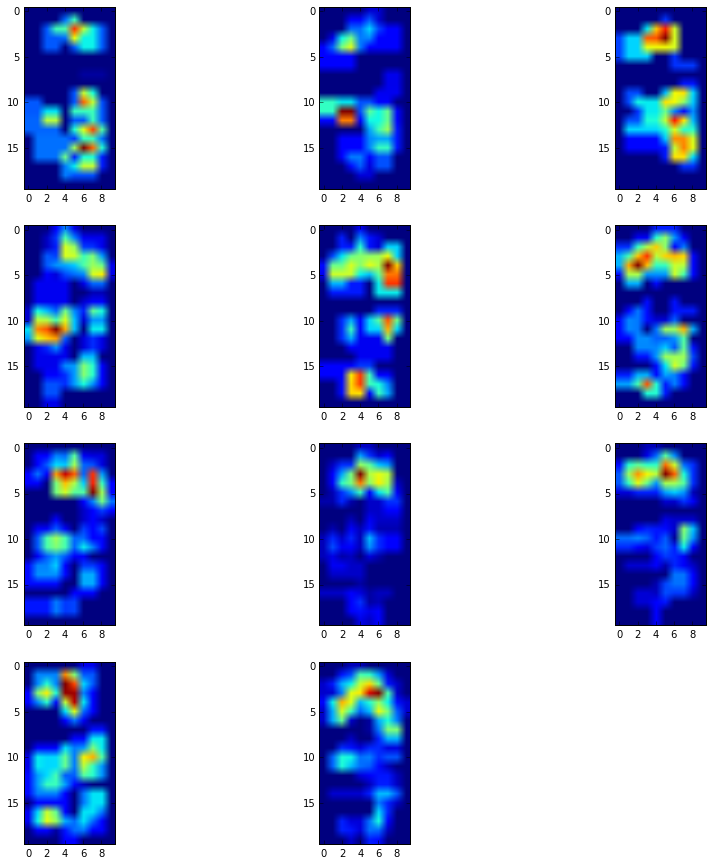

In [147]:
w_viz = plot_ft_weights(clf.clf,None)

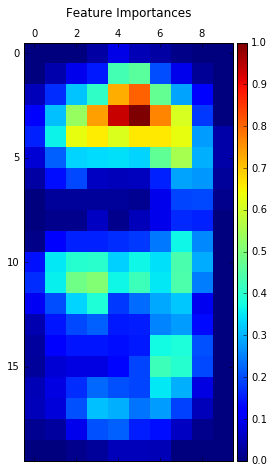

In [137]:
im = plt.matshow(w_viz)
ax = plt.gca() 
plt.title('Feature Importances')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
